In [1]:
#load("modelssaved/LH1000_l005_f10.RData")
#dats = out
load("modelssaved/LH1000_l005_noreg.RData")
dat0 = out
load("modelssaved/LH500_l002.RData")
dats2 = out
load("modelssaved/LH500_l0002.RData")
dats3 = out
load("modelssaved/LH_distmat.RData")

In [4]:
source("model/NMFbatch.R")

In [2]:
xmat = matrix(rnorm(16), nrow = 8)
xmat

0.06811606,1.43671123
-0.62785608,-0.07454008
-1.64004043,-1.80120812
1.32600085,0.23206252
-2.18381106,-0.41169187
-0.25027804,-0.36227931
-0.60238143,0.22972294
-0.14033001,0.85520193


In [24]:
groupondist(xmat,3)




[1] 1 2 0 1 0 2 2 1

In [15]:
batch_vec

[1] 2 1 0 2 1 1 2 0

In [16]:
size

[1] 1

In [8]:
sqrt(sum((xmat[1,] - xmat[2,])^2))

[1] 0.8268959

### The distance from lengthscale 

\begin{align*}
\exp(-0.002*dist) &= 0.5 \\
dist &= -\frac{1}{0.002} \log(0.5) \\
dist &\approx 150
\end{align*}

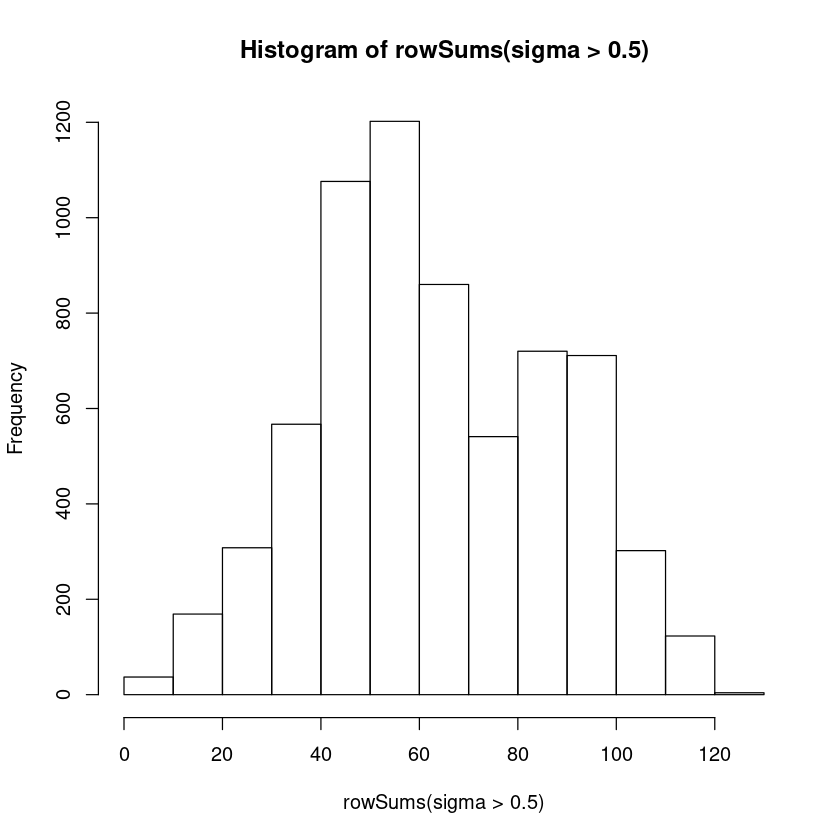

In [2]:
sigma = exp(-0.002*dist)
hist(rowSums(sigma>0.5))

In [3]:
# the different correlations
c0 = cor(t(dat0$exposures))
mean(c0[sigma > 0.5| sigma < 1])
cs2 = cor(t(dats2$exposures))
mean(cs2[sigma > 0.5| sigma < 1])
cs3 = cor(t(dats3$exposures))
mean(cs3[sigma > 0.5 | sigma < 1])


[1] 0.02631616

[1] 0.3046027

[1] 0.5729635

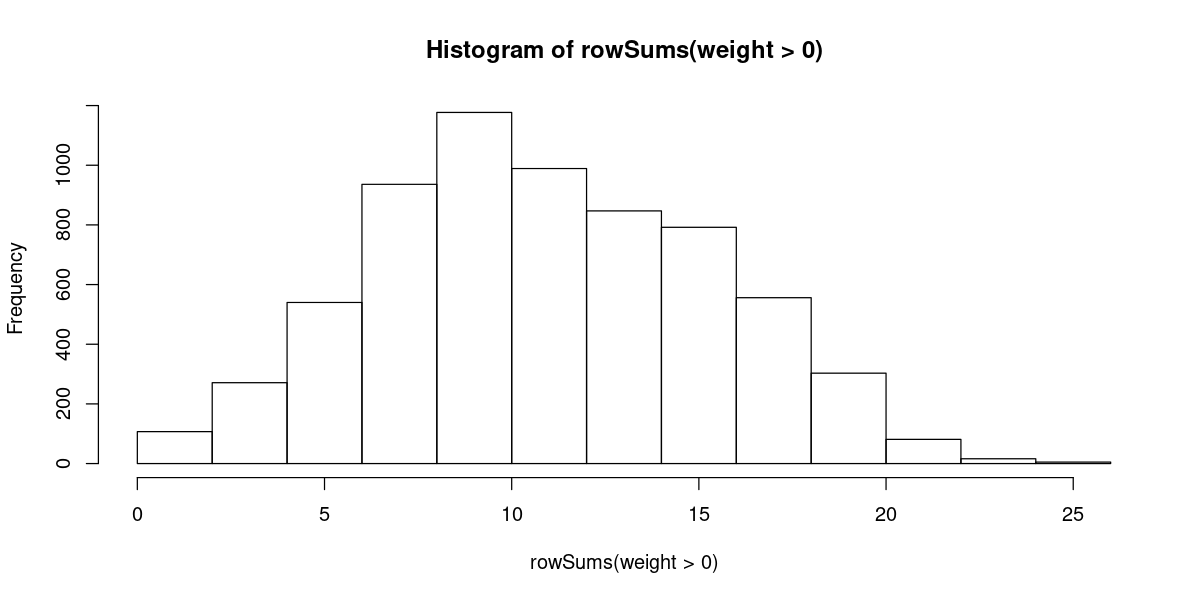

In [8]:
weight = exp(-0.005*dist)
weight[weight < 0.5] = 0
weight = weight/rowSums(weight)

hist(rowSums(weight>0))

It is known that if you have data $X$ with covariance $\Sigma$, then $WX$ will have covariance $W\Sigma W^T$.

In [9]:
cormean = c()
posmean = c()
wmat = diag(nrow(weight))
for(i in 1:200){
    wmat =  weight%*%wmat%*%t(weight)
    D = sqrt(diag(wmat))
    cormat =  t(wmat/D) /D
    cormean[i] = mean(cormat[sigma > 0.5 | sigma < 1])
    posmean[i] = mean(cormat[sigma > 0.5 | sigma < 1] > 0)
}



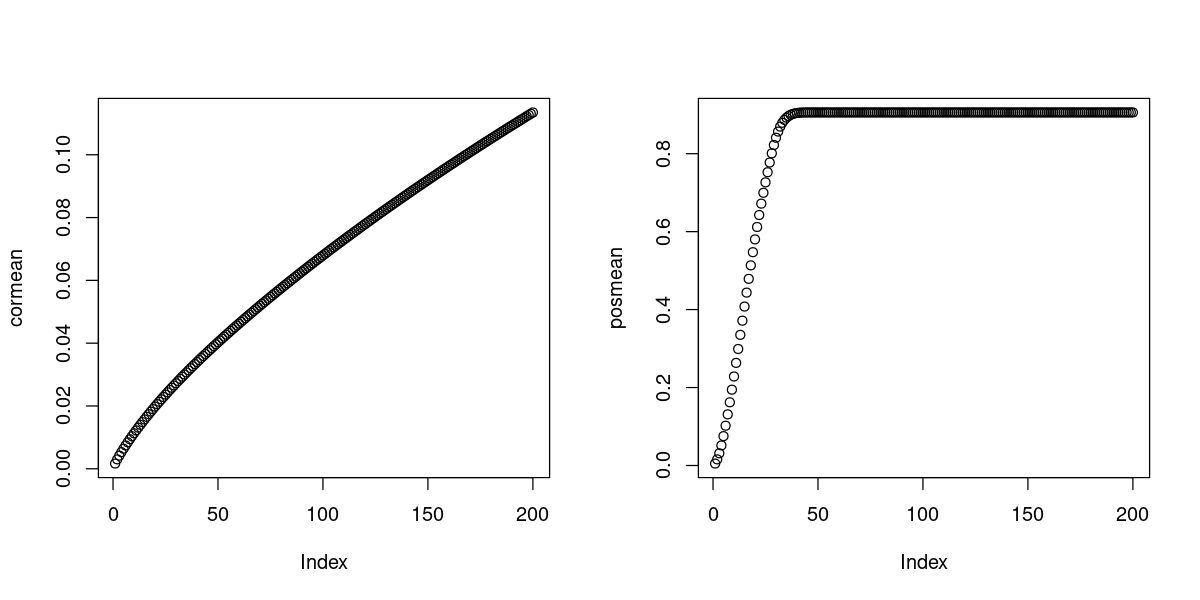

In [10]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(cormean)
plot(posmean)


### The correlation for NMF weights 

In [31]:
library(Rcpp)
library(RcppArmadillo)
sourceCpp("model/NMFspatial.cpp")

# load the data count
count = read.csv('data/LH_counts.csv', header = T)
count = as.matrix(count)
count = count[,-1]

genes = colnames(count)

data = count
data = data/rowSums(data)




In [ ]:
weight = exp(-0.01*dist)
weight[weight < 0.2] = 0
weight = weight/rowSums(weight)

hist(rowSums(weight>0.05))

In [37]:
out0 = nmfspatial(data, 10,weight = weight, initial = 1, smallIter = 100, maxiter = 100)
corNMF = c()
errorNMF = c()
c0 = cor(t(out0$exposures))
corNMF[1] = mean(c0[sigma > 0.5| sigma < 1])
errorNMF[1] = out0$gkl

for(i in 2:30){
    out = nmftrain(data, out0$exposures, out0$signatures, weight = weight, iter = i)
    c0 = cor(t(out$exposures))
    corNMF[i] = mean(c0[sigma > 0.5| sigma < 1])
    errorNMF[i] = out$gkl
    out0 = out
}

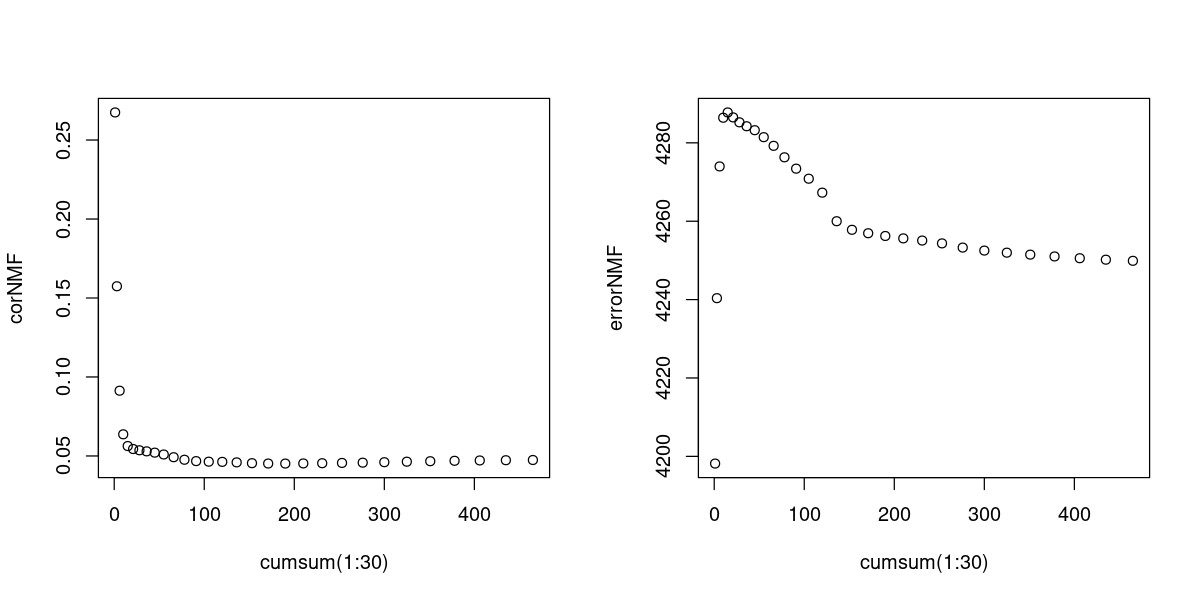

In [39]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(cumsum(1:30),corNMF)
plot(cumsum(1:30),errorNMF)

## More neighbors included

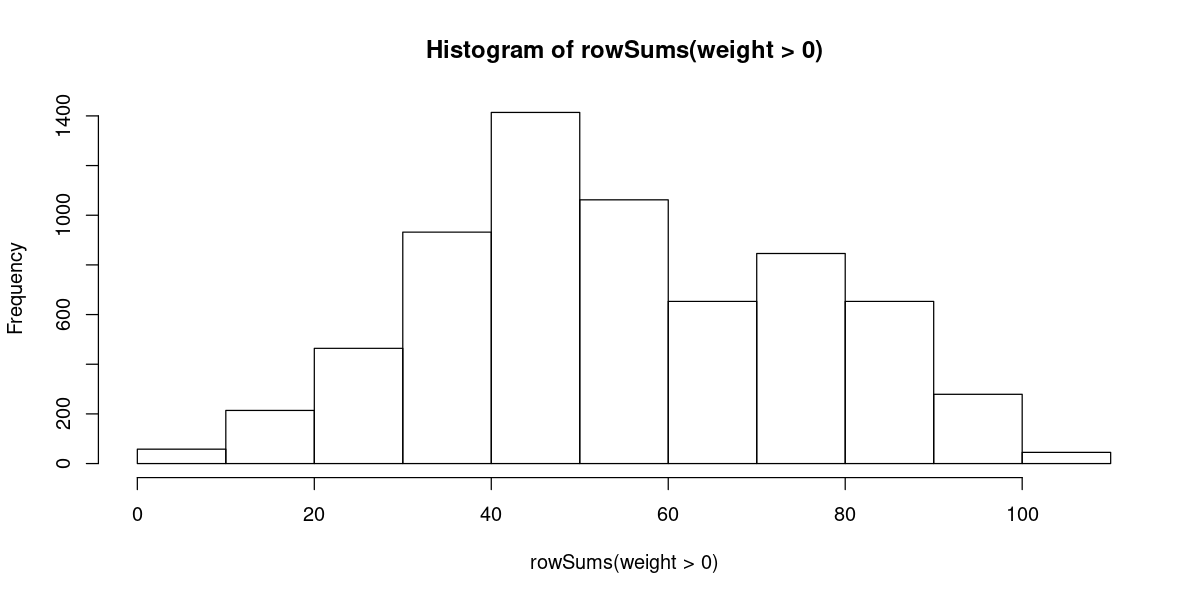

In [42]:
weight = exp(-0.005*dist)
weight[weight < 0.2] = 0
weight = weight/rowSums(weight)

hist(rowSums(weight>0))

In [43]:
out0 = nmfspatial(data, 10,weight = weight, initial = 1, smallIter = 100, maxiter = 100)
corNMF = c()
errorNMF = c()
c0 = cor(t(out0$exposures))
corNMF[1] = mean(c0[sigma > 0.5| sigma < 1])
errorNMF[1] = out0$gkl

for(i in 2:30){
    out = nmftrain(data, out0$exposures, out0$signatures, weight = weight, iter = i)
    c0 = cor(t(out$exposures))
    corNMF[i] = mean(c0[sigma > 0.5| sigma < 1])
    errorNMF[i] = out$gkl
    out0 = out
}

In [ ]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(cumsum(1:30),corNMF)
plot(cumsum(1:30),errorNMF)